In [1]:
# Cell 1
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    LabelEncoder,
    OneHotEncoder,
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_excel("dataOfPlayers (1).xlsx")

# Display the first few rows of the dataset
df.head()

,ID,Name,Sex,Age,Height,Weight,Club,Sport,Competition,Gold_Medal,Silver_Medal,Bronze_Medal,Medal_Number,Medal_Weight
0,1,Ahmed Hossam El-Sayed,M,24,180.0,80.0,Cairo Fencing Club,Fencing,Cairo Open Fencing Championship,3,5,4,12,63
1,2,Mohamed Youssef Ali,M,23,170.0,60.0,Nile Rowing Association,Rowing,Nile River Rowing Regatta,7,5,5,17,105
2,3,Amina Abdelrahman,F,24,NaN,NaN,Cairo Fencing Club,Fencing,Cairo Open Fencing Championship,3,6,6,15,72
3,4,Heba El-Sharkawy,F,34,NaN,NaN,Alexandria Archery Club,Archery,Alexandria Coastal Archery Cup,5,2,2,9,64
4,5,Youssef Amr El-Masry,M,21,185.0,82.0,Giza Tennis Association,Tennis,Giza Pyramids Tennis Classic,2,4,8,14,56


In [2]:
# Import necessary module
# import pandas as pd
# from sklearn.impute import SimpleImputer


# Define numerical and categorical columns
numerical_cols = ["Age", "Height", "Weight", "Gold_Medal", "Silver_Medal", "Bronze_Medal", "Medal_Number", "Medal_Weight"]
categorical_cols = ["Name", "Sex", "Club", "Sport", "Competition"]

# Impute missing values for numerical columns with mean strategy
numerical_imputer = SimpleImputer(strategy="mean")
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])

# Impute missing values for categorical columns with most frequent strategy
categorical_imputer = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# show result
df.head()

,ID,Name,Sex,Age,Height,Weight,Club,Sport,Competition,Gold_Medal,Silver_Medal,Bronze_Medal,Medal_Number,Medal_Weight
0,1,Ahmed Hossam El-Sayed,M,24.0,180.000000,80.000000,Cairo Fencing Club,Fencing,Cairo Open Fencing Championship,3.0,5.0,4.0,12.0,63.0
1,2,Mohamed Youssef Ali,M,23.0,170.000000,60.000000,Nile Rowing Association,Rowing,Nile River Rowing Regatta,7.0,5.0,5.0,17.0,105.0
2,3,Amina Abdelrahman,F,24.0,175.333333,74.178947,Cairo Fencing Club,Fencing,Cairo Open Fencing Championship,3.0,6.0,6.0,15.0,72.0
3,4,Heba El-Sharkawy,F,34.0,175.333333,74.178947,Alexandria Archery Club,Archery,Alexandria Coastal Archery Cup,5.0,2.0,2.0,9.0,64.0
4,5,Youssef Amr El-Masry,M,21.0,185.000000,82.000000,Giza Tennis Association,Tennis,Giza Pyramids Tennis Classic,2.0,4.0,8.0,14.0,56.0


In [3]:
# Cell 3
# Step 2: Scale numerical values with three different methods
# Standard Scaler
standard_scaler = StandardScaler()
df_standard = df.copy()
df_standard[numerical_cols] = standard_scaler.fit_transform(df_standard[numerical_cols])

# Min-Max Scaler
minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[numerical_cols] = minmax_scaler.fit_transform(df_minmax[numerical_cols])

# Robust Scaler
robust_scaler = RobustScaler()
df_robust = df.copy()
df_robust[numerical_cols] = robust_scaler.fit_transform(df_robust[numerical_cols])

# show result
#df_standard.head()

In [4]:
#df_robust.head()

In [5]:
df_minmax.head()

,ID,Name,Sex,Age,Height,Weight,Club,Sport,Competition,Gold_Medal,Silver_Medal,Bronze_Medal,Medal_Number,Medal_Weight
0,1,Ahmed Hossam El-Sayed,M,0.3750,0.724138,0.604938,Cairo Fencing Club,Fencing,Cairo Open Fencing Championship,0.3,0.555556,0.500,0.388889,0.317073
1,2,Mohamed Youssef Ali,M,0.3125,0.379310,0.111111,Nile Rowing Association,Rowing,Nile River Rowing Regatta,0.7,0.555556,0.625,0.666667,0.658537
2,3,Amina Abdelrahman,F,0.3750,0.563218,0.461209,Cairo Fencing Club,Fencing,Cairo Open Fencing Championship,0.3,0.666667,0.750,0.555556,0.390244
3,4,Heba El-Sharkawy,F,1.0000,0.563218,0.461209,Alexandria Archery Club,Archery,Alexandria Coastal Archery Cup,0.5,0.222222,0.250,0.222222,0.325203
4,5,Youssef Amr El-Masry,M,0.1875,0.896552,0.654321,Giza Tennis Association,Tennis,Giza Pyramids Tennis Classic,0.2,0.444444,1.000,0.500000,0.260163


In [6]:
# Cell 4
# Step 3: Encode categorical values with two different methods
# Label Encoding
label_encoder = LabelEncoder()
df_label = df.copy()
df_label[categorical_cols] = df_label[categorical_cols].apply(
    label_encoder.fit_transform
)

# One-Hot Encoding
onehot_encoder = OneHotEncoder(drop="first")
df_onehot = df.copy()
df_onehot_encoded = pd.DataFrame(
    onehot_encoder.fit_transform(df_onehot[categorical_cols])
)
df_onehot = pd.concat([df_onehot, df_onehot_encoded], axis=1)
df_onehot.drop(categorical_cols, axis=1, inplace=True)

# show result
# df_label.head()
df_onehot.head()



,ID,Age,Height,Weight,Gold_Medal,Silver_Medal,Bronze_Medal,Medal_Number,Medal_Weight,0
0,1,24.0,180.000000,80.000000,3.0,5.0,4.0,12.0,63.0,"(0, 2)\t1.0\n (0, 99)\t1.0\n (0, 100)\t1.0..."
1,2,23.0,170.000000,60.000000,7.0,5.0,5.0,17.0,105.0,"(0, 53)\t1.0\n (0, 99)\t1.0\n (0, 104)\t1...."
2,3,24.0,175.333333,74.178947,3.0,6.0,6.0,15.0,72.0,"(0, 5)\t1.0\n (0, 100)\t1.0\n (0, 106)\t1...."
3,4,34.0,175.333333,74.178947,5.0,2.0,2.0,9.0,64.0,"(0, 31)\t1.0"
4,5,21.0,185.000000,82.000000,2.0,4.0,8.0,14.0,56.0,"(0, 96)\t1.0\n (0, 99)\t1.0\n (0, 101)\t1...."


In [7]:
df_label.head()

,ID,Name,Sex,Age,Height,Weight,Club,Sport,Competition,Gold_Medal,Silver_Medal,Bronze_Medal,Medal_Number,Medal_Weight
0,1,3,1,24.0,180.000000,80.000000,1,2,1,3.0,5.0,4.0,12.0,63.0
1,2,54,1,23.0,170.000000,60.000000,5,4,4,7.0,5.0,5.0,17.0,105.0
2,3,6,0,24.0,175.333333,74.178947,1,2,1,3.0,6.0,6.0,15.0,72.0
3,4,32,0,34.0,175.333333,74.178947,0,0,0,5.0,2.0,2.0,9.0,64.0
4,5,97,1,21.0,185.000000,82.000000,2,5,3,2.0,4.0,8.0,14.0,56.0


In [8]:
# Check data types
print(df.dtypes)

# Check for any non-numeric values
print(df.select_dtypes(include="object"))

ID                int64
Name             object
Sex              object
Age             float64
Height          float64
Weight          float64
Club             object
Sport            object
Competition      object
Gold_Medal      float64
Silver_Medal    float64
Bronze_Medal    float64
Medal_Number    float64
Medal_Weight    float64
dtype: object
                     Name Sex                     Club    Sport  \
0   Ahmed Hossam El-Sayed   M       Cairo Fencing Club  Fencing   
1     Mohamed Youssef Ali   M  Nile Rowing Association   Rowing   
2       Amina Abdelrahman   F       Cairo Fencing Club  Fencing   
3        Heba El-Sharkawy   F  Alexandria Archery Club  Archery   
4    Youssef Amr El-Masry   M  Giza Tennis Association   Tennis   
..                    ...  ..                      ...      ...   
95     Mazen Bassam Fawzy   M  Nile Rowing Association   Rowing   
96       Bassam Aref Nour   M  Nile Rowing Association   Rowing   
97       Aref Gamal Sabry   M  Giza Tennis Asso

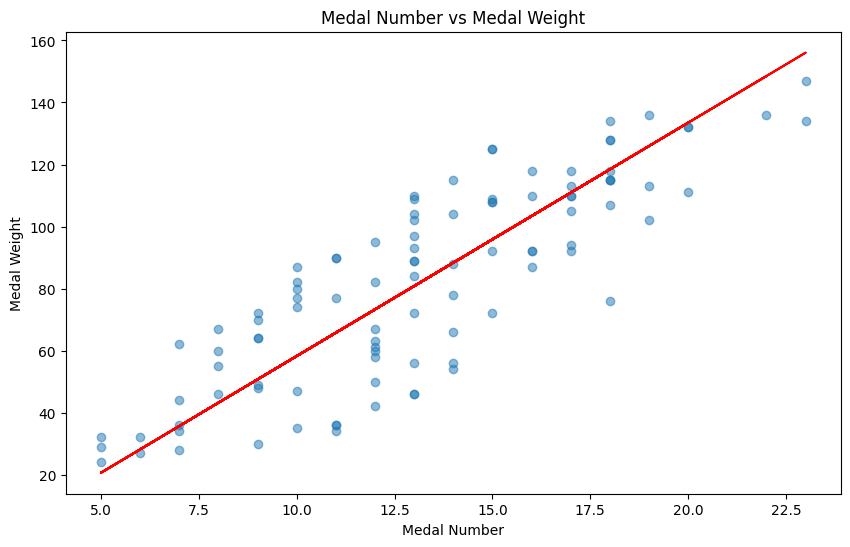

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(df.Medal_Number, df.Medal_Weight, alpha=0.5)
plt.plot(df.Medal_Number, df.Medal_Number * 7.5234 - 16.9943, color="red")
plt.title("Medal Number vs Medal Weight")
plt.xlabel("Medal Number")
plt.ylabel("Medal Weight")
plt.show()

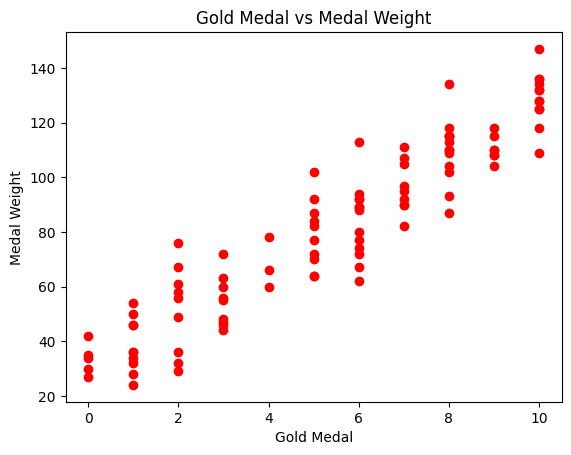

In [10]:
plt.scatter(df.Gold_Medal, df.Medal_Weight, color="red")
plt.title("Gold Medal vs Medal Weight")
plt.xlabel("Gold Medal")
plt.ylabel("Medal Weight")
plt.show()

In [11]:
df_label.head()

,ID,Name,Sex,Age,Height,Weight,Club,Sport,Competition,Gold_Medal,Silver_Medal,Bronze_Medal,Medal_Number,Medal_Weight
0,1,3,1,24.0,180.000000,80.000000,1,2,1,3.0,5.0,4.0,12.0,63.0
1,2,54,1,23.0,170.000000,60.000000,5,4,4,7.0,5.0,5.0,17.0,105.0
2,3,6,0,24.0,175.333333,74.178947,1,2,1,3.0,6.0,6.0,15.0,72.0
3,4,32,0,34.0,175.333333,74.178947,0,0,0,5.0,2.0,2.0,9.0,64.0
4,5,97,1,21.0,185.000000,82.000000,2,5,3,2.0,4.0,8.0,14.0,56.0


In [12]:
# Define features and target
features = ["Gold_Medal", "Medal_Number"]
X = df_label[features]
y = df_label["Medal_Weight"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = model.predict(X_test)



In [13]:
import pickle
pickle.dump(model, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))

In [14]:

# Cell 6
# Step 5: Train a Linear Regression model
#model = LinearRegression()
#model.fit(X_train, y_train)

# show result



In [15]:
print(model.coef_)
print(model.intercept_)

[7.0232747 3.1186918]
2.858348780418339


In [16]:
# # Assuming X is a DataFrame and 'Years_of_Experience' is one of its columns
# plt.scatter(X, model.predict(X), color="blue")
# plt.title("Predicted Medal Weight vs Gold Medal")
# plt.xlabel("Gold Medal")
# plt.ylabel("Medal Weight")
# plt.show()

In [17]:
# Test the model and make predictions
y_train_pred = model.predict(X_train)
print(y_train_pred)

[ 94.89706579  85.54099039  53.54330868 106.61081449  28.59377428
  38.73574078 122.9901646   66.82883959  44.18723328 119.08558169
  76.18491499  45.75901548 115.18099879  40.28265038  83.20818969
  76.18491499  66.04294849  86.32688149  78.51771569  69.94753139
 112.06230699  74.61313278  54.32919978  90.23146439  73.04135058
  32.49835718  89.44557329  54.32919978 129.22754819 115.18099879
 132.34623999  66.04294849  55.11509088  51.99639908 115.18099879
 109.72950629  72.28033209  37.16395858 115.96688989  85.54099039
 112.06230699  73.06622319  88.65968219  98.80164869  98.01575759
  86.32688149  31.71246608 135.46493179 106.61081449  32.49835718
 119.8714728   25.47508248  76.18491499  48.87770728  75.39902389
  31.71246608  94.89706579 113.6340892   21.57049958  30.92657498
  50.42461688  48.87770728  74.61313278 144.82100719 105.03903229
 102.70623159  90.99248289  70.70854988  78.51771569  44.97312438
 105.82492339  99.58753979 108.15772409 119.8714728   47.30592508
 135.46493

In [18]:
print(len(X))
print(len(y))
print(len(X_train))
print(len(y_train_pred))

100
100
80
80


In [19]:
# import pickle

# # Load the trained model
# with open('X_train.pkl', 'rb') as f:
#     model = pickle.load(f)

# def predict(input_data):
#     # Make predictions using the loaded model
#     prediction = model.predict(input_data)
#     return prediction


In [20]:
print("R2 = ", r2_score(y_train, y_train_pred))
print("MAE = ", mean_absolute_error(y_train, y_train_pred))
print("MRSE = ", mean_squared_error(y_train, y_train_pred))


R2 =  0.9851758062724122
MAE =  3.2793030367215557
MRSE =  14.693497613356698


In [21]:
y_test_pred = model.predict(X_test)

In [22]:
print("R2 = ", r2_score(y_test, y_test_pred))
print("MAE = ", mean_absolute_error(y_test, y_test_pred))
print("MRSE = ", mean_squared_error(y_test, y_test_pred))

R2 =  0.9716048760861326
MAE =  4.691066123776687
MRSE =  30.904968916614177


In [23]:
input_1 = [5, 9] 
output_1 = model.predict([input_1])
print(output_1)

[66.04294849]


c:\Users\20120\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
